# **Bellabeat Case Study**

### **Business Scenario**
Bellabeat is a high-tech manufacturer of health-focused products for women. Collecting data on activity, sleep, stress, and reproductive health empowers women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.
 
The purpose of the case study is to analyze smart device fitness data to gain insight into how consumers use their smart devices. The insights will help unlock new growth opportunities for the company.

### **🧭 Phase 1: Ask**

#### **Business Task**

Analyze Fitbit smart device usage data to discover trends in users’ activity, sleep, and wellness behaviors. Use these insights to guide Bellabeat’s marketing strategy and recommend actions that will help the company increase product engagement and brand growth.

#### **Key Stakeholders**

* Urška Sršen – Cofounder & Chief Creative Officer
* Sando Mur – Cofounder & Executive Team Member
* Bellabeat Marketing Analytics Team

#### **Key questions for business:**

 * What are some of the trends in smart device usage?
 * How could these trends apply to Bellabeat customers?
 * How could these trends help influence Bellabeat marketing strategy?

### **⚙️ Phase 2: PREPARE**

#### **Dataset Used** 

[**FitBit Fitness Tracker Data**](https://www.kaggle.com/datasets/arashnic/fitbit/data) – Public dataset from **Kaggle**, collected by **Möbius** (CC0: Public Domain)
It includes data from **30 Fitbit users** who logged their **daily activity, sleep, and heart rate** using wearable devices.

#### **Data Features**

- Daily activity (steps, distance, calories)  
- Sleep records (minutes asleep, time in bed)  
- Heart rate and intensity levels  
- Weight logs and metadata

- Format: CSV files (~18 datasets)

#### **Data Credibility (ROCCC)**

| Factor | Description |
|:--|:--|
| **R - Reliable** | Moderate – self-reported, small sample size |
| **O - Original** | Yes – real Fitbit user data |
| **C - Comprehensive** | Covers key fitness and wellness metrics |
| **C - Current** | 2016 data – slightly outdated |
| **C - Cited** | Published and verified on Kaggle |

### **🧹 Phase 3: Process**

#### **Datasets & Tools:**

**Datasets:**

The following analysis will be focused on three datasets: "dailyActivity_merged" "sleepDay_merged", "weightLogInfo_merged.csv" to identify trends in user data.​The processes of data cleaning, manipulation, analysis, and visualization will be performed using python.

**Tools:**
- **Excel** – for initial cleaning and inspection  
- **Python/Data Wrangler Extension** – for advanced data cleaning, transformation, and analysis

In [80]:
## Setting up my environment by importing Librabries and loading the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


daily_activity = pd.read_csv('dailyActivity_merged.csv')
sleep_day = pd.read_csv('sleepDay_merged.csv')
weight_log = pd.read_csv('weightLogInfo_merged.csv')

#### **Data Review:**

In [81]:
daily_activity.head()
weight_log.head()
sleep_day.head()

daily_activity.tail()
weight_log.tail()
sleep_day.tail()

daily_activity.describe()
weight_log.describe()
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


#### **Cleaning the daily_activity dataset**

In [82]:
# Rename column 'acitvity_date' to 'date'
daily_activity = daily_activity.rename(columns={'ActivityDate': 'date'})

# Change column type to datetime64[ns] for column: 'date'
daily_activity = daily_activity.astype({'date': 'datetime64[ns]'})

# Round columns 'Id', 'TotalSteps' and 12 other columns (Number of decimals: 2)
daily_activity = daily_activity.round({'Id': 2, 'TotalSteps': 2, 'TotalDistance': 2, 'TrackerDistance': 2, 'LoggedActivitiesDistance': 2, 'VeryActiveDistance': 2, 'ModeratelyActiveDistance': 2, 'LightActiveDistance': 2, 'SedentaryActiveDistance': 2, 'VeryActiveMinutes': 2, 'FairlyActiveMinutes': 2, 'LightlyActiveMinutes': 2, 'SedentaryMinutes': 2, 'Calories': 2})

# Clean column names to snake_case
import inflection
daily_activity.columns = [inflection.underscore(col) for col in daily_activity.columns]

daily_activity

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.25,18.25,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.56,19.56,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


#### **Cleaning the weight_log dataset**

In [83]:
import inflection

# Drop column: 'Fat' since having no information for insights
weight_log = weight_log.drop(columns=['Fat'])

# Change column type to datetime64[ns] for column: 'Date'
weight_log = weight_log.astype({'Date': 'datetime64[ns]'})

# Round columns 'Id', 'WeightKg' and 3 other columns (Number of decimals: 2)
weight_log = weight_log.round({'Id': 2, 'WeightKg': 2, 'WeightPounds': 2, 'BMI': 2, 'LogId': 2})

# Clean column names to snake_case
weight_log.columns = [inflection.underscore(col) for col in weight_log.columns]

# Separate date and time from the date column
weight_log[['date_only', 'time_only']] = weight_log['date'].astype(str).str.split(' ', expand=True)

print(weight_log)

            id                date  weight_kg  weight_pounds    bmi  \
0   1503960366 2016-05-02 23:59:59       52.6         115.96  22.65   
1   1503960366 2016-05-03 23:59:59       52.6         115.96  22.65   
2   1927972279 2016-04-13 01:08:52      133.5         294.32  47.54   
3   2873212765 2016-04-21 23:59:59       56.7         125.00  21.45   
4   2873212765 2016-05-12 23:59:59       57.3         126.32  21.69   
..         ...                 ...        ...            ...    ...   
62  8877689391 2016-05-06 06:43:35       85.0         187.39  25.44   
63  8877689391 2016-05-08 07:35:53       85.4         188.27  25.56   
64  8877689391 2016-05-09 06:39:44       85.5         188.50  25.61   
65  8877689391 2016-05-11 06:51:47       85.4         188.27  25.56   
66  8877689391 2016-05-12 06:42:53       84.0         185.19  25.14   

    is_manual_report         log_id   date_only time_only  
0               True  1462233599000  2016-05-02  23:59:59  
1               True  14623

#### **Cleaning the sleep_day dataset**

In [84]:
from datetime import datetime
import inflection

# Drop duplicate rows across all columns
sleep_day = sleep_day.drop_duplicates()

# Clean column names to snake_case
sleep_day.columns = [inflection.underscore(col) for col in sleep_day.columns]

# Rename column 'sleep_day' to 'date'
sleep_day = sleep_day.rename(columns={'sleep_day': 'date'})

# Change column type to datetime64[ns] for column: 'date'
sleep_day = sleep_day.astype({'date': 'datetime64[ns]'})


sleep_day

,id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


### **📊 Phase 4: Analyze**

#### **Data Integration**

In [85]:
#Merged daily_activity and sleep_day datasets using user ID and date.

fitbit_data = daily_activity.merge(sleep_day, on=["id", "date"], how="left")
fitbit_data

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,NaN
936,8877689391,2016-05-09,20226,18.25,18.25,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,NaN
937,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN
938,8877689391,2016-05-11,21420,19.56,19.56,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,NaN


Combined data gives a holistic view of user activity, sleep, and calorie patterns.

#### **Descriptive Statistics**

In [86]:
# Let’s find the averages for key health indicators.
avg_steps = fitbit_data["total_steps"].mean()
avg_calories = fitbit_data["calories"].mean()
avg_distance = fitbit_data["total_distance"].mean()
avg_sleep_hours = (fitbit_data["total_minutes_asleep"].mean())/60

print(f"Average Steps: {avg_steps:.0f}")
print(f"Average Distance: {avg_distance:.2f} miles")
print(f"Average Calories: {avg_calories:.0f}")
print(f"Average Sleep Hours: {avg_sleep_hours:.2f}")


Average Steps: 7638
Average Distance: 5.49 miles
Average Calories: 2304
Average Sleep Hours: 6.99


Users show **moderate daily activity (7,638 steps, 5.49 miles)** and **slightly insufficient sleep (6.99 hrs)**, suggesting a balanced but improvable lifestyle. Further analysis should explore **relationships between activity levels, sleep duration, and calorie burn** to identify key behavior patterns.

#### **Behavorial Analysis**

##### **Daily Activity Distribution**

sedentary_minutes         931738
lightly_active_minutes    181244
very_active_minutes        19895
fairly_active_minutes      12751
dtype: int64


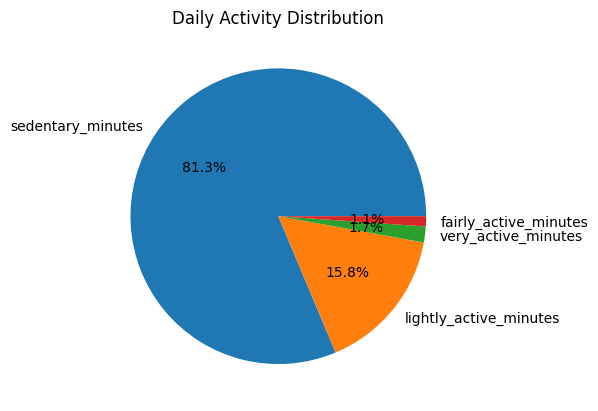

In [87]:
activity_levels = ["very_active_minutes", "fairly_active_minutes", "lightly_active_minutes", "sedentary_minutes"]

total_minutes = daily_activity[activity_levels].sum().sort_values(ascending=False)
print(total_minutes)

total_minutes.plot(kind="pie", autopct="%1.1f%%", title= "Daily Activity Distribution")
plt.show()

Users spend **over 80% of their time in sedentary activity**, indicating low overall movement levels and highlighting an opportunity for Bellabeat to promote more active daily habits.

##### **Weekday Trends**

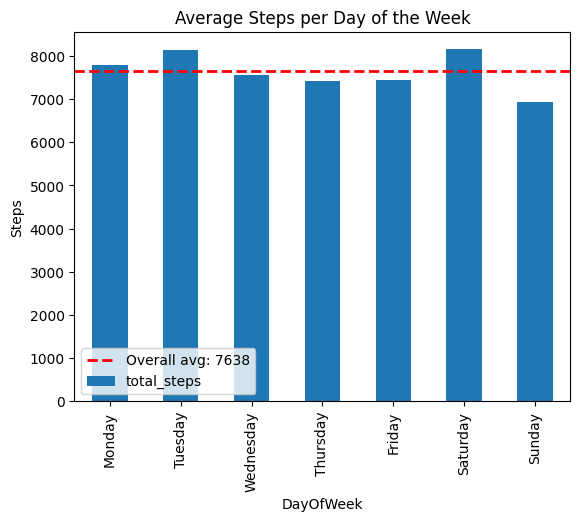

In [88]:
fitbit_data["DayOfWeek"] = fitbit_data["date"].dt.day_name()
steps_by_day = fitbit_data.groupby("DayOfWeek")["total_steps"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

steps_by_day.plot(kind="bar", title="Average Steps per Day of the Week")
plt.ylabel("Steps")
plt.axhline(avg_steps, color = "red", linestyle = "--", linewidth = 2, label = f"Overall avg: {avg_steps:.0f}")
plt.legend(loc = "lower left")
plt.show()

Daily step patterns show that users are **most active on Saturday, Tuesday, and Monday**, while activity drops **below the overall average on Wednesday, Thursday, Friday, and Sunday**. This suggests users tend to be more active early in the week and on weekends, with midweek showing lower engagement.

#### **Correlation Analysis**

##### **Steps vs Calories**

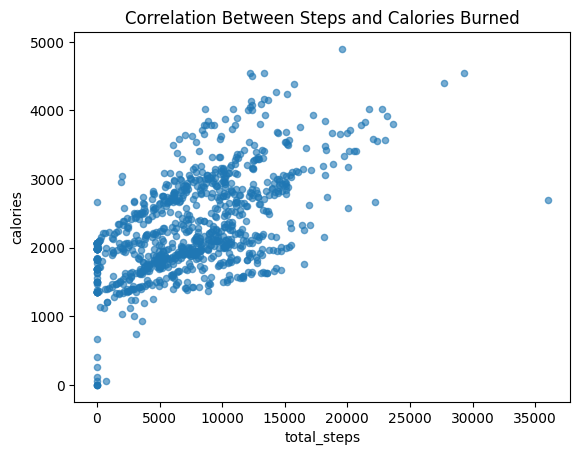

Correlation: 0.5915680862453354


In [89]:
fitbit_data.plot(kind="scatter", x="total_steps", y="calories", alpha=0.6)
plt.title("Correlation Between Steps and Calories Burned")
plt.show()

print("Correlation:", fitbit_data["total_steps"].corr(fitbit_data["calories"]))

There is a **moderate positive correlation (r = 0.59)** between steps and calories burned, indicating that higher step counts are generally associated with increased calorie expenditure.

##### **Sleep and Steps**

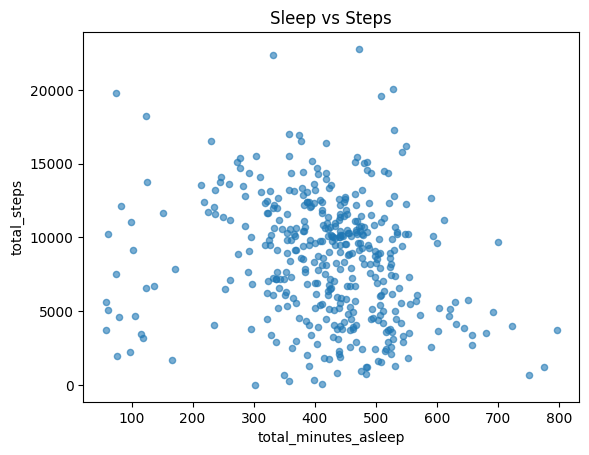

Correlation: -0.19034391666763162


In [90]:
fitbit_data.plot(kind="scatter", x="total_minutes_asleep", y="total_steps", alpha=0.6)
plt.title("Sleep vs Steps")
plt.show()

print("Correlation:", fitbit_data["total_minutes_asleep"].corr(fitbit_data["total_steps"]))

There is a **weak negative correlation (r = -0.19)** between sleep duration and steps, suggesting that higher activity levels may slightly correspond with shorter sleep durations.

##### **Correlation heatmap (Steps, Sleep, Calories)**

                      total_steps  total_minutes_asleep  calories
total_steps              1.000000             -0.190344  0.591568
total_minutes_asleep    -0.190344              1.000000 -0.031699
calories                 0.591568             -0.031699  1.000000


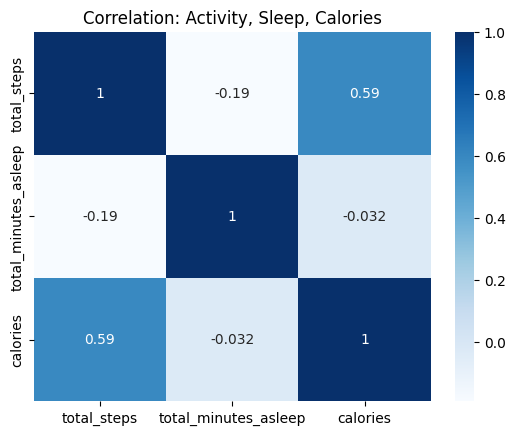

In [91]:
corr = fitbit_data[['total_steps', 'total_minutes_asleep', 'calories']].corr()
print(corr)


import seaborn as sns
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation: Activity, Sleep, Calories")
plt.show()

The correlation matrix shows that **steps and calories** have a **moderate positive relationship (r = 0.59)**, while **sleep duration** has a **weak negative correlation** with both steps (r = -0.19) and calories (r = -0.03). This indicates that higher activity levels align with greater calorie burn but slightly less sleep.

#### **Body Metrics Analysis**

##### **BMI Distribution**

8 users logged weight data
                 id                           date   weight_kg  weight_pounds  \
count  6.700000e+01                             67   67.000000      67.000000   
mean   7.009282e+09  2016-04-27 15:39:54.283582208   72.035821     158.810746   
min    1.503960e+09            2016-04-12 06:47:11   52.600000     115.960000   
25%    6.962181e+09            2016-04-19 15:19:45   61.400000     135.360000   
50%    6.962181e+09            2016-04-27 23:59:59   62.500000     137.790000   
75%    8.877689e+09     2016-05-04 15:24:10.500000   85.050000     187.500000   
max    8.877689e+09            2016-05-12 23:59:59  133.500000     294.320000   
std    1.950322e+09                            NaN   13.923206      30.695989   

             bmi        log_id  
count  67.000000  6.700000e+01  
mean   25.185224  1.461772e+12  
min    21.450000  1.460444e+12  
25%    23.960000  1.461079e+12  
50%    24.390000  1.461802e+12  
75%    25.560000  1.462375e+12  
max    47.54

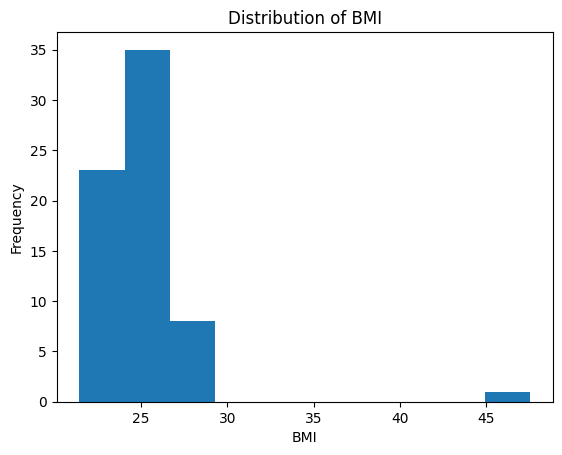

In [92]:
print(weight_log["id"].nunique(), "users logged weight data")
print(weight_log.describe())

weight_log["bmi"].plot(kind="hist", bins=10, title="Distribution of BMI")
plt.xlabel("BMI")
plt.show()

Only **8 users logged weight data**, with an average **BMI of 25.2**, which falls in the **slightly overweight** range. Most users’ BMI values cluster between **24 and 26**, suggesting generally healthy but borderline weight levels among the logged participants.

##### **BMI Categories**

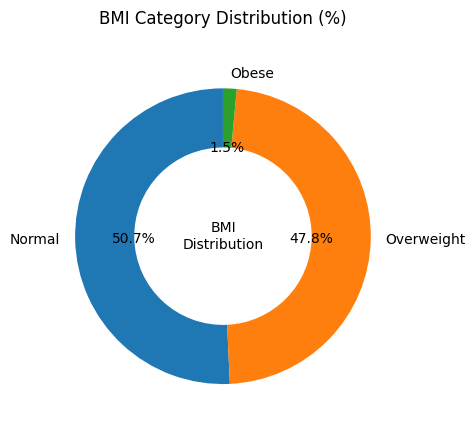

In [93]:
import matplotlib.pyplot as plt

# Define BMI category function
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Apply BMI category classification
weight_log["BMI_Category"] = weight_log["bmi"].apply(bmi_category)

# Calculate percentage by category
bmi_counts = weight_log["BMI_Category"].value_counts(normalize=True) * 100

# Create donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    bmi_counts,
    labels=bmi_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4),  # creates the donut hole
)

# Add title and center label
plt.title("BMI Category Distribution (%)", pad=20)
plt.text(0, 0, "BMI\nDistribution", ha="center", va="center", fontsize=10)

plt.show()


The BMI distribution shows that **50.7% of users fall within the normal range**, **47.8% are overweight**, and **1.5% are obese**, indicating that while most users maintain a healthy weight, nearly half could benefit from weight management support.

### **📈 Phase 5: Share – Communicating Insights**

 - A complete storytelling report with visualizations and recommendations is available here:  
👉  [Open Bellabeat Insights Report](Bellabeat_report.md)

### **🚀 Phase 6: Act – Turning Insights into Action**

Fitbit data reveals that users are active but inconsistent — moving well on some days, resting little, and sitting too long.  
Bellabeat can use these patterns to create meaningful, everyday wellness experiences that feel natural and supportive.  

---

**🎯 1. Encourage Consistent Activity**  
 - **Insight:** Users average **7,600 steps/day**, most active on weekends and early weekdays.  
 - **Recommendation:**  
    Use **Bellabeat Leaf** and **Time** to promote steady daily movement through gentle app reminders and progress badges.  

**😴 2. Support Rest & Recovery**  
 - **Insight:** Average sleep of **6.8 hours** and weak link with activity suggest poor recovery.  
 - **Recommendation:**  
    Enable **Bellabeat Time** to deliver bedtime prompts and sleep-quality insights, promoting balanced rest as part of wellness.  

**💧 3. Improve Hydration Habits**  
 - **Insight:** Low energy and activity trends indicate inconsistent hydration.  
 - **Recommendation:**  
    Integrate the **Bellabeat Spring** smart bottle with app-based hydration goals and gentle “refill reminders.”  

**🪑 4. Reduce Sedentary Time**  
 - **Insight:** Users spend **80% of their day sedentary**, limiting overall wellness.  
 - **Recommendation:**  
    Add **micro-movement alerts** and short guided stretch prompts in the **Bellabeat App** to encourage light, consistent activity.  

**⚖️ 5. Personalize the Wellness Journey**  
 - **Insight:** Average **BMI of 25.2** and varied routines show diverse user needs.  
 - **Recommendation:**  
    Leverage **Bellabeat Membership** for personalized wellness plans combining sleep, activity, and hydration data into actionable insights.  

**🌿 Summary**  
> Bellabeat can transform wellness tracking into **daily empowerment** — helping users find rhythm, rest, and balance through **smart, empathetic technology.**

### **🏁 Conclusion – The Bellabeat Opportunity**

- Fitbit data reveals that women value wellness but often struggle with consistency — balancing movement, rest, and hydration amid busy lives.  
- This insight gives **Bellabeat** a clear path forward: design experiences that celebrate balance, not perfection. By aligning its products — **Leaf**, **Time**, **Spring**, and **Membership** — with real habits, Bellabeat can become a trusted wellness companion rather than just a device brand.  

>Bellabeat can turn everyday data into everyday empowerment — helping women live healthier, calmer, and more connected lives.